## Maximum likelihood mapmaking

2025-11-23 19:54:24.909 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading:  69%|███████████     | 2.90M/4.20M [00:00<00:00, 29.0MB/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 39.4MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -2.311e-04
    max: -5.838e-08
    rms: 2.941e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


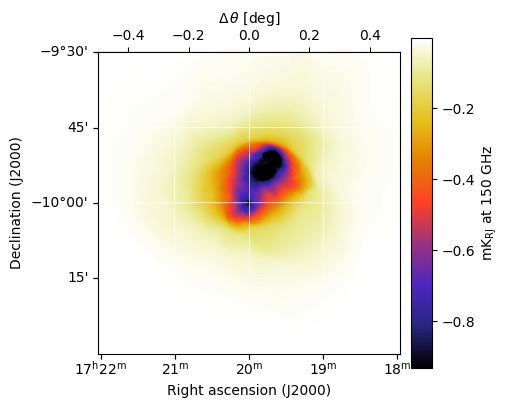

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 2e1 

input_map.to("uK_RJ").plot()
print(input_map)

PlanList(2 plans, 1200 s):
                           start_time duration   target(ra,dec)     center(az,el)
chunk                                                                            
0      2025-11-24 16:33:49.400 +00:00    600 s  (260°, -9.999°)  (49.47°, 71.01°)
1      2025-11-24 16:44:26.900 +00:00    600 s  (260°, -9.999°)  (43.25°, 72.79°)


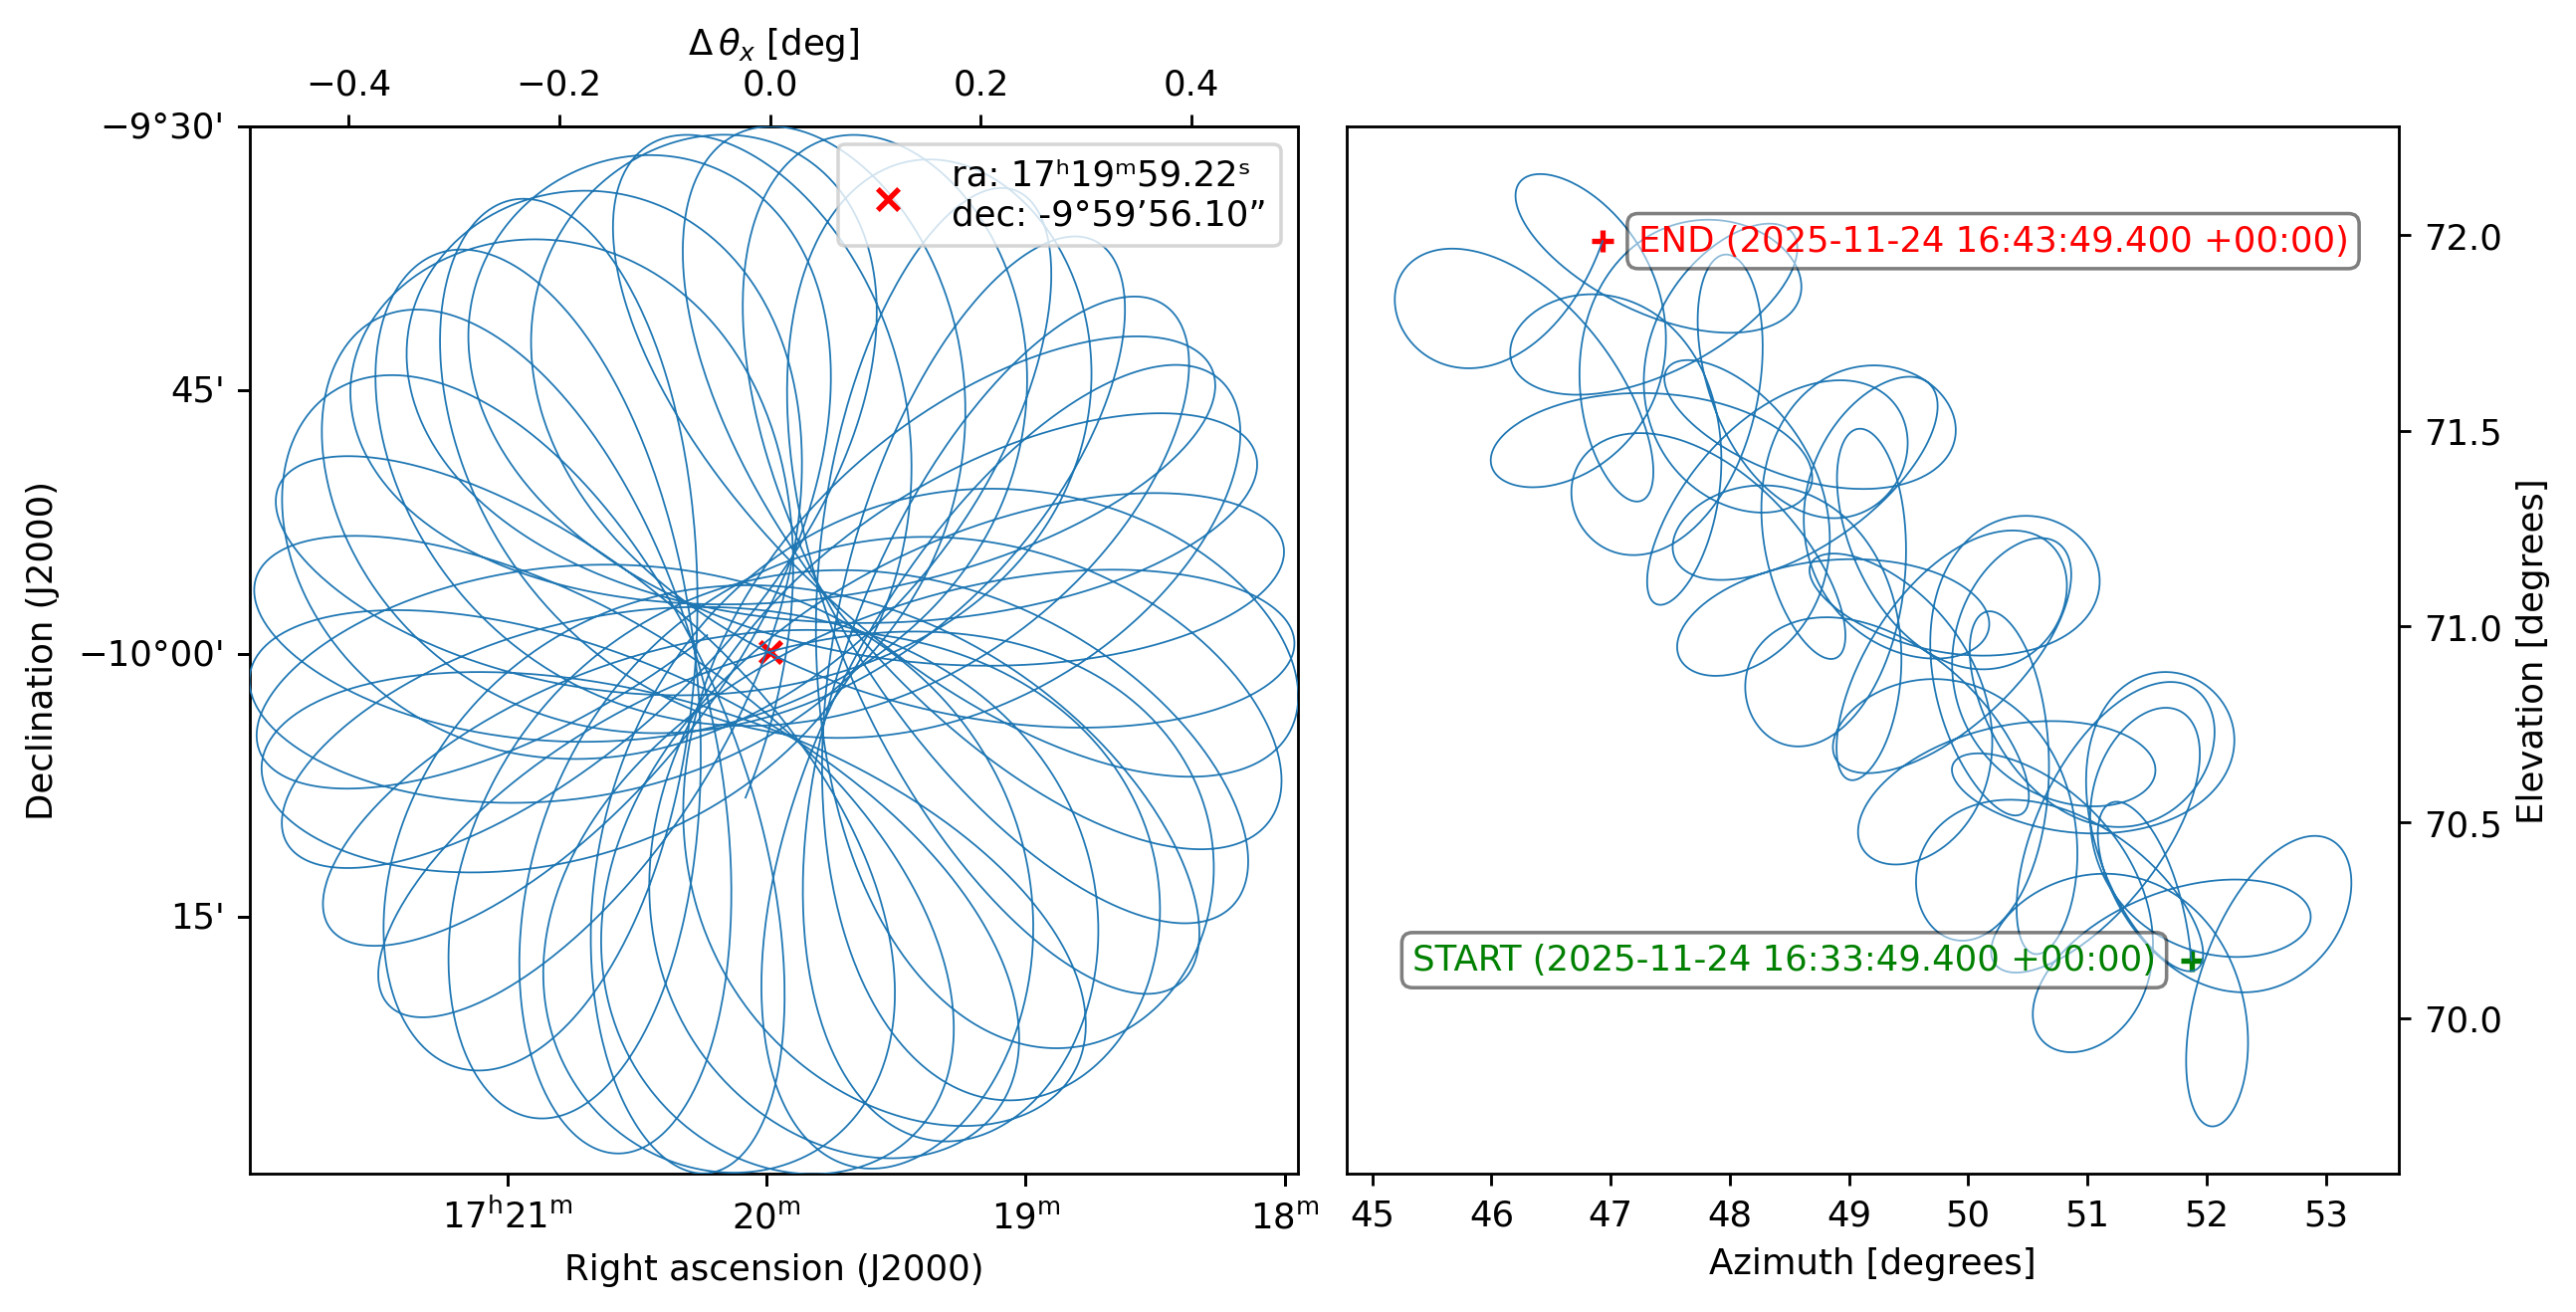

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=1200, 
                               max_chunk_duration=600, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  678  5.953’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


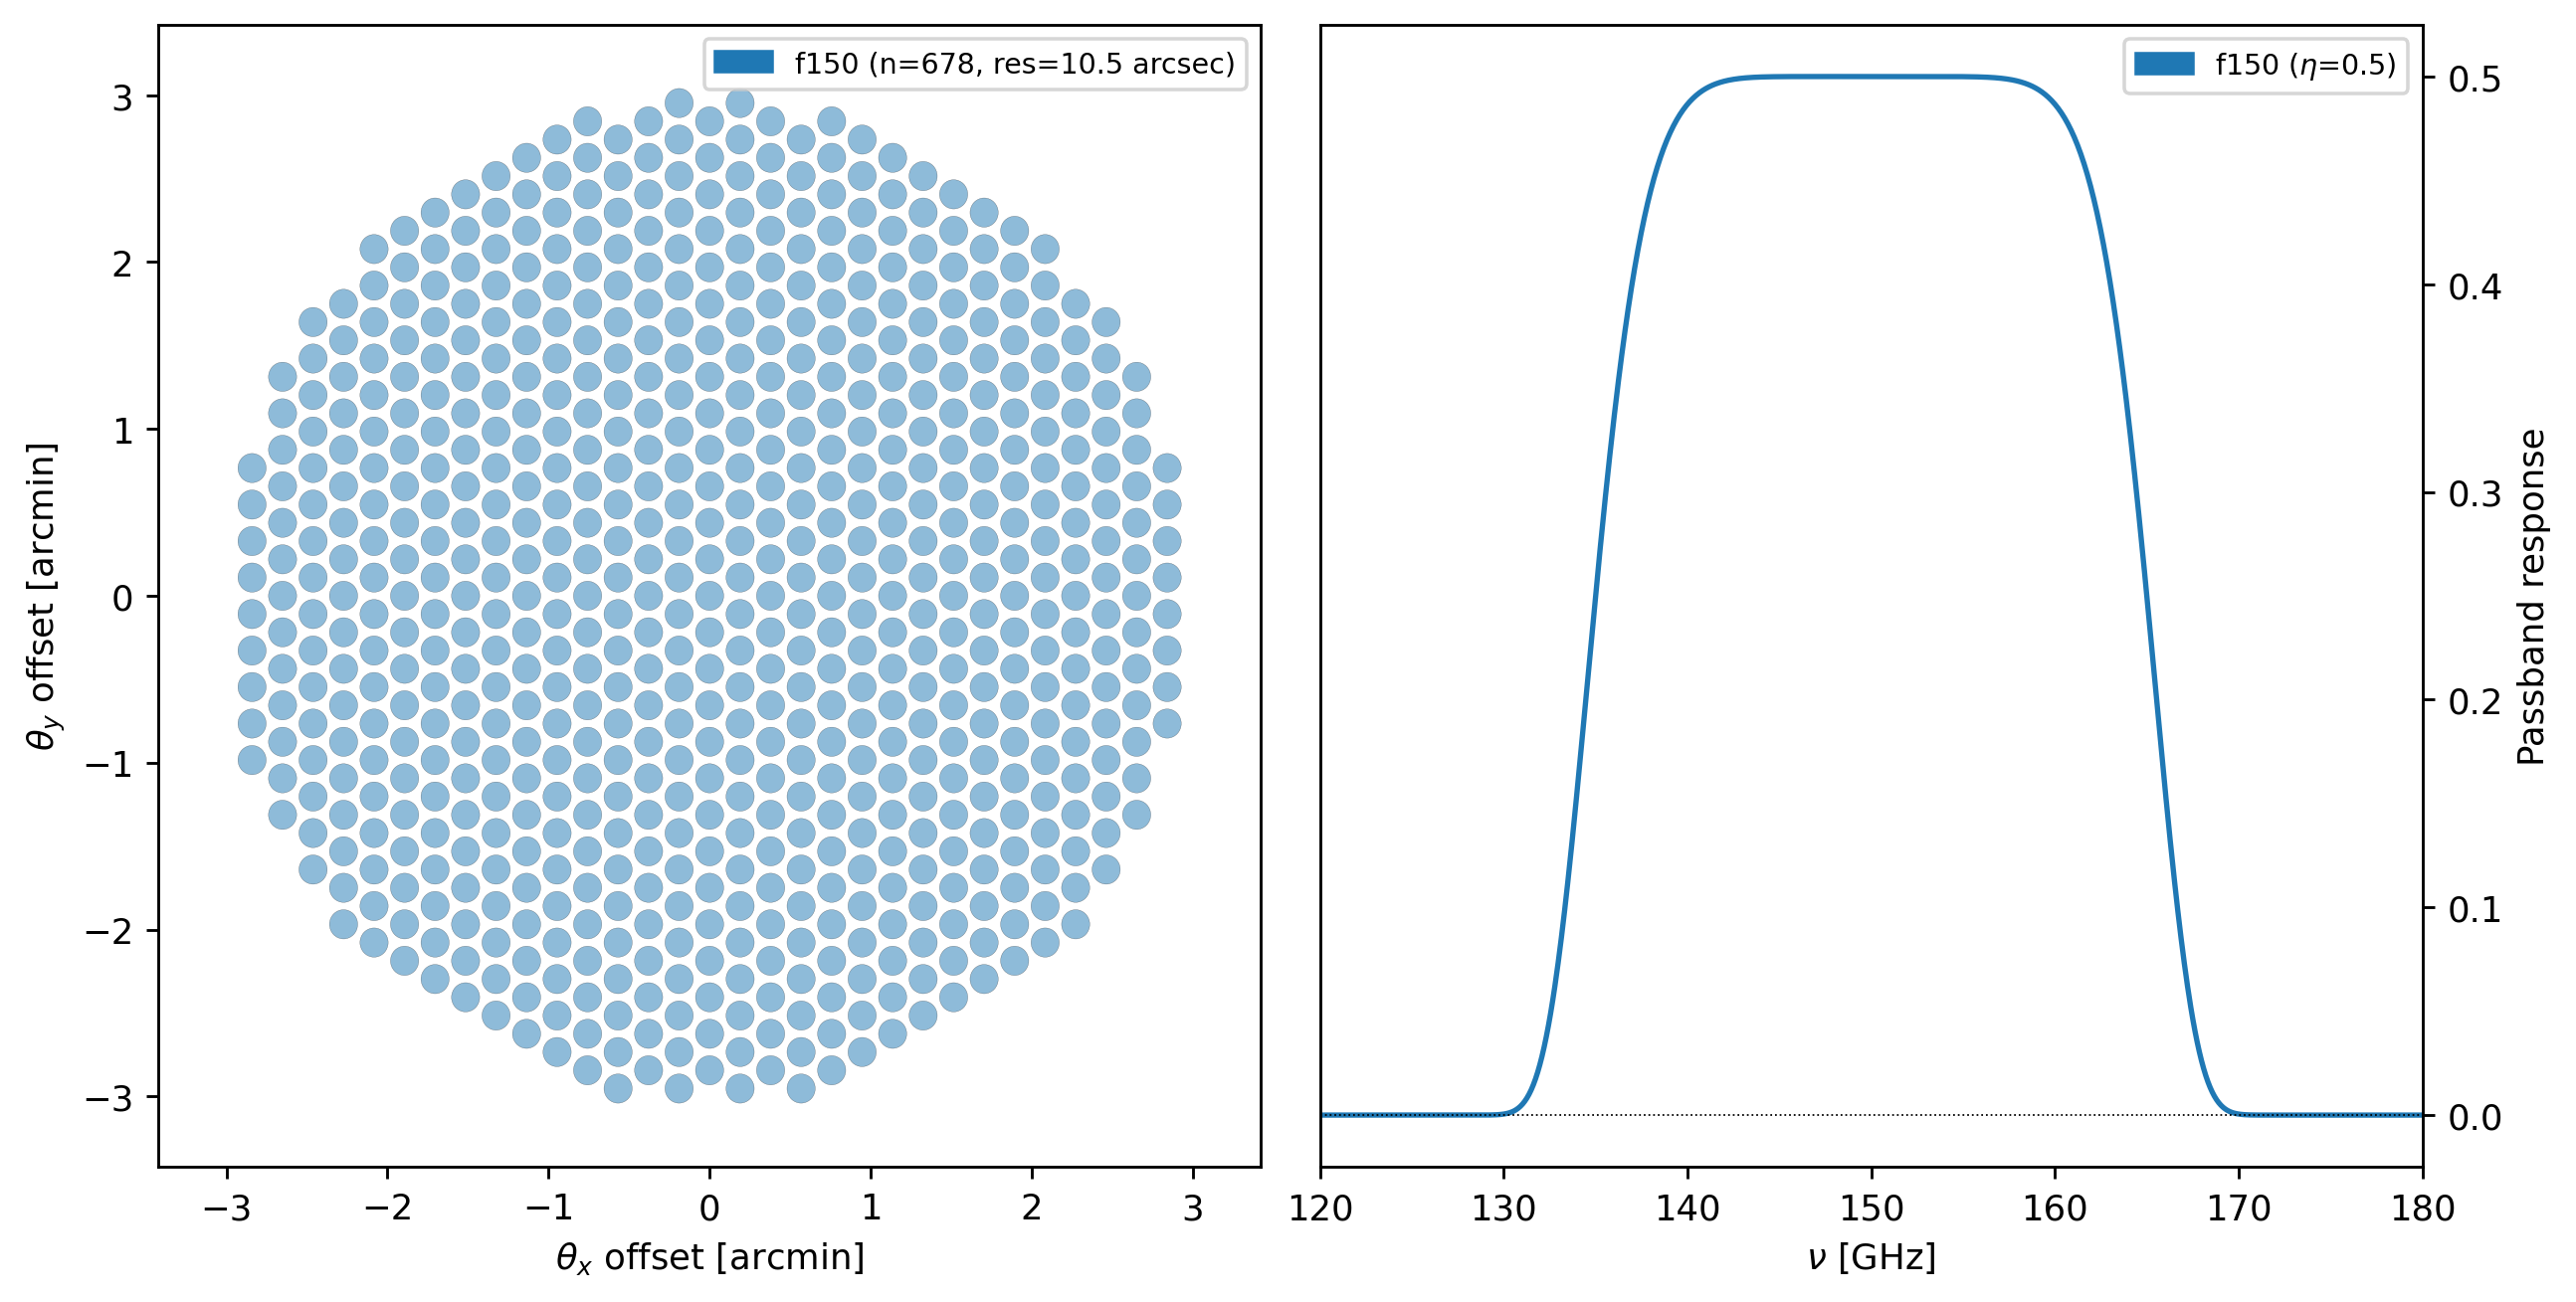

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e0, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.25,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  678  5.953’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 1200 s):
│                            start_time duration   target(ra,dec)     center(az,el)
│ chunk                                                                            
│ 0      2025-11-24 16:33:49.400 +00:00    600 s  (260°, -9.999°)  (49.47°, 71.01°)
│ 1      2025-11-24 16:44:26.900 +00:00    600 s  (260°, -9.999°)  (43.25°, 72.79°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.]

2025-11-23 19:54:38.017 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:04,  1.52it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:04,  1.50it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:02<00:03,  1.49it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.44it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:02,  1.20it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:04<00:01,  1.10it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:05<00:00,  1.12it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.16it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.22it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 38.98it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.35it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 23.81it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:11,  1.60s/it]

Sampling turbulence:  25%|████            | 2/8 [00:02<00:06,  1.00s/it]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:04,  1.23it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:03<00:02,  1.41it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.54it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:04<00:01,  1.60it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:05<00:00,  1.64it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.66it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.42it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.15s/it, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.15s/it, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:17<00:00, 17.74s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:17<00:00, 17.74s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.40s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.40s/it, band=f150]

2025-11-23 19:55:42.500 INFO: Simulated observation 1 of 2 in 64.47 s


2025-11-23 19:55:42.501 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:05,  1.19it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:04,  1.31it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:02<00:03,  1.40it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:02<00:02,  1.46it/s]

Constructing atmosphere:  62%|██████████      | 5/8 [00:03<00:02,  1.27it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:04<00:01,  1.27it/s]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:05<00:00,  1.23it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.21it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:06<00:00,  1.27it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 38.89it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 22.17it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 23.64it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:10,  1.43s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:05,  1.14it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.41it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.59it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.68it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:01,  1.75it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:04<00:00,  1.56it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.62it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.49it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.21it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.21it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.33s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.33s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.25s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.25s/it, band=f150]

2025-11-23 19:56:42.782 INFO: Simulated observation 2 of 2 in 60.27 s


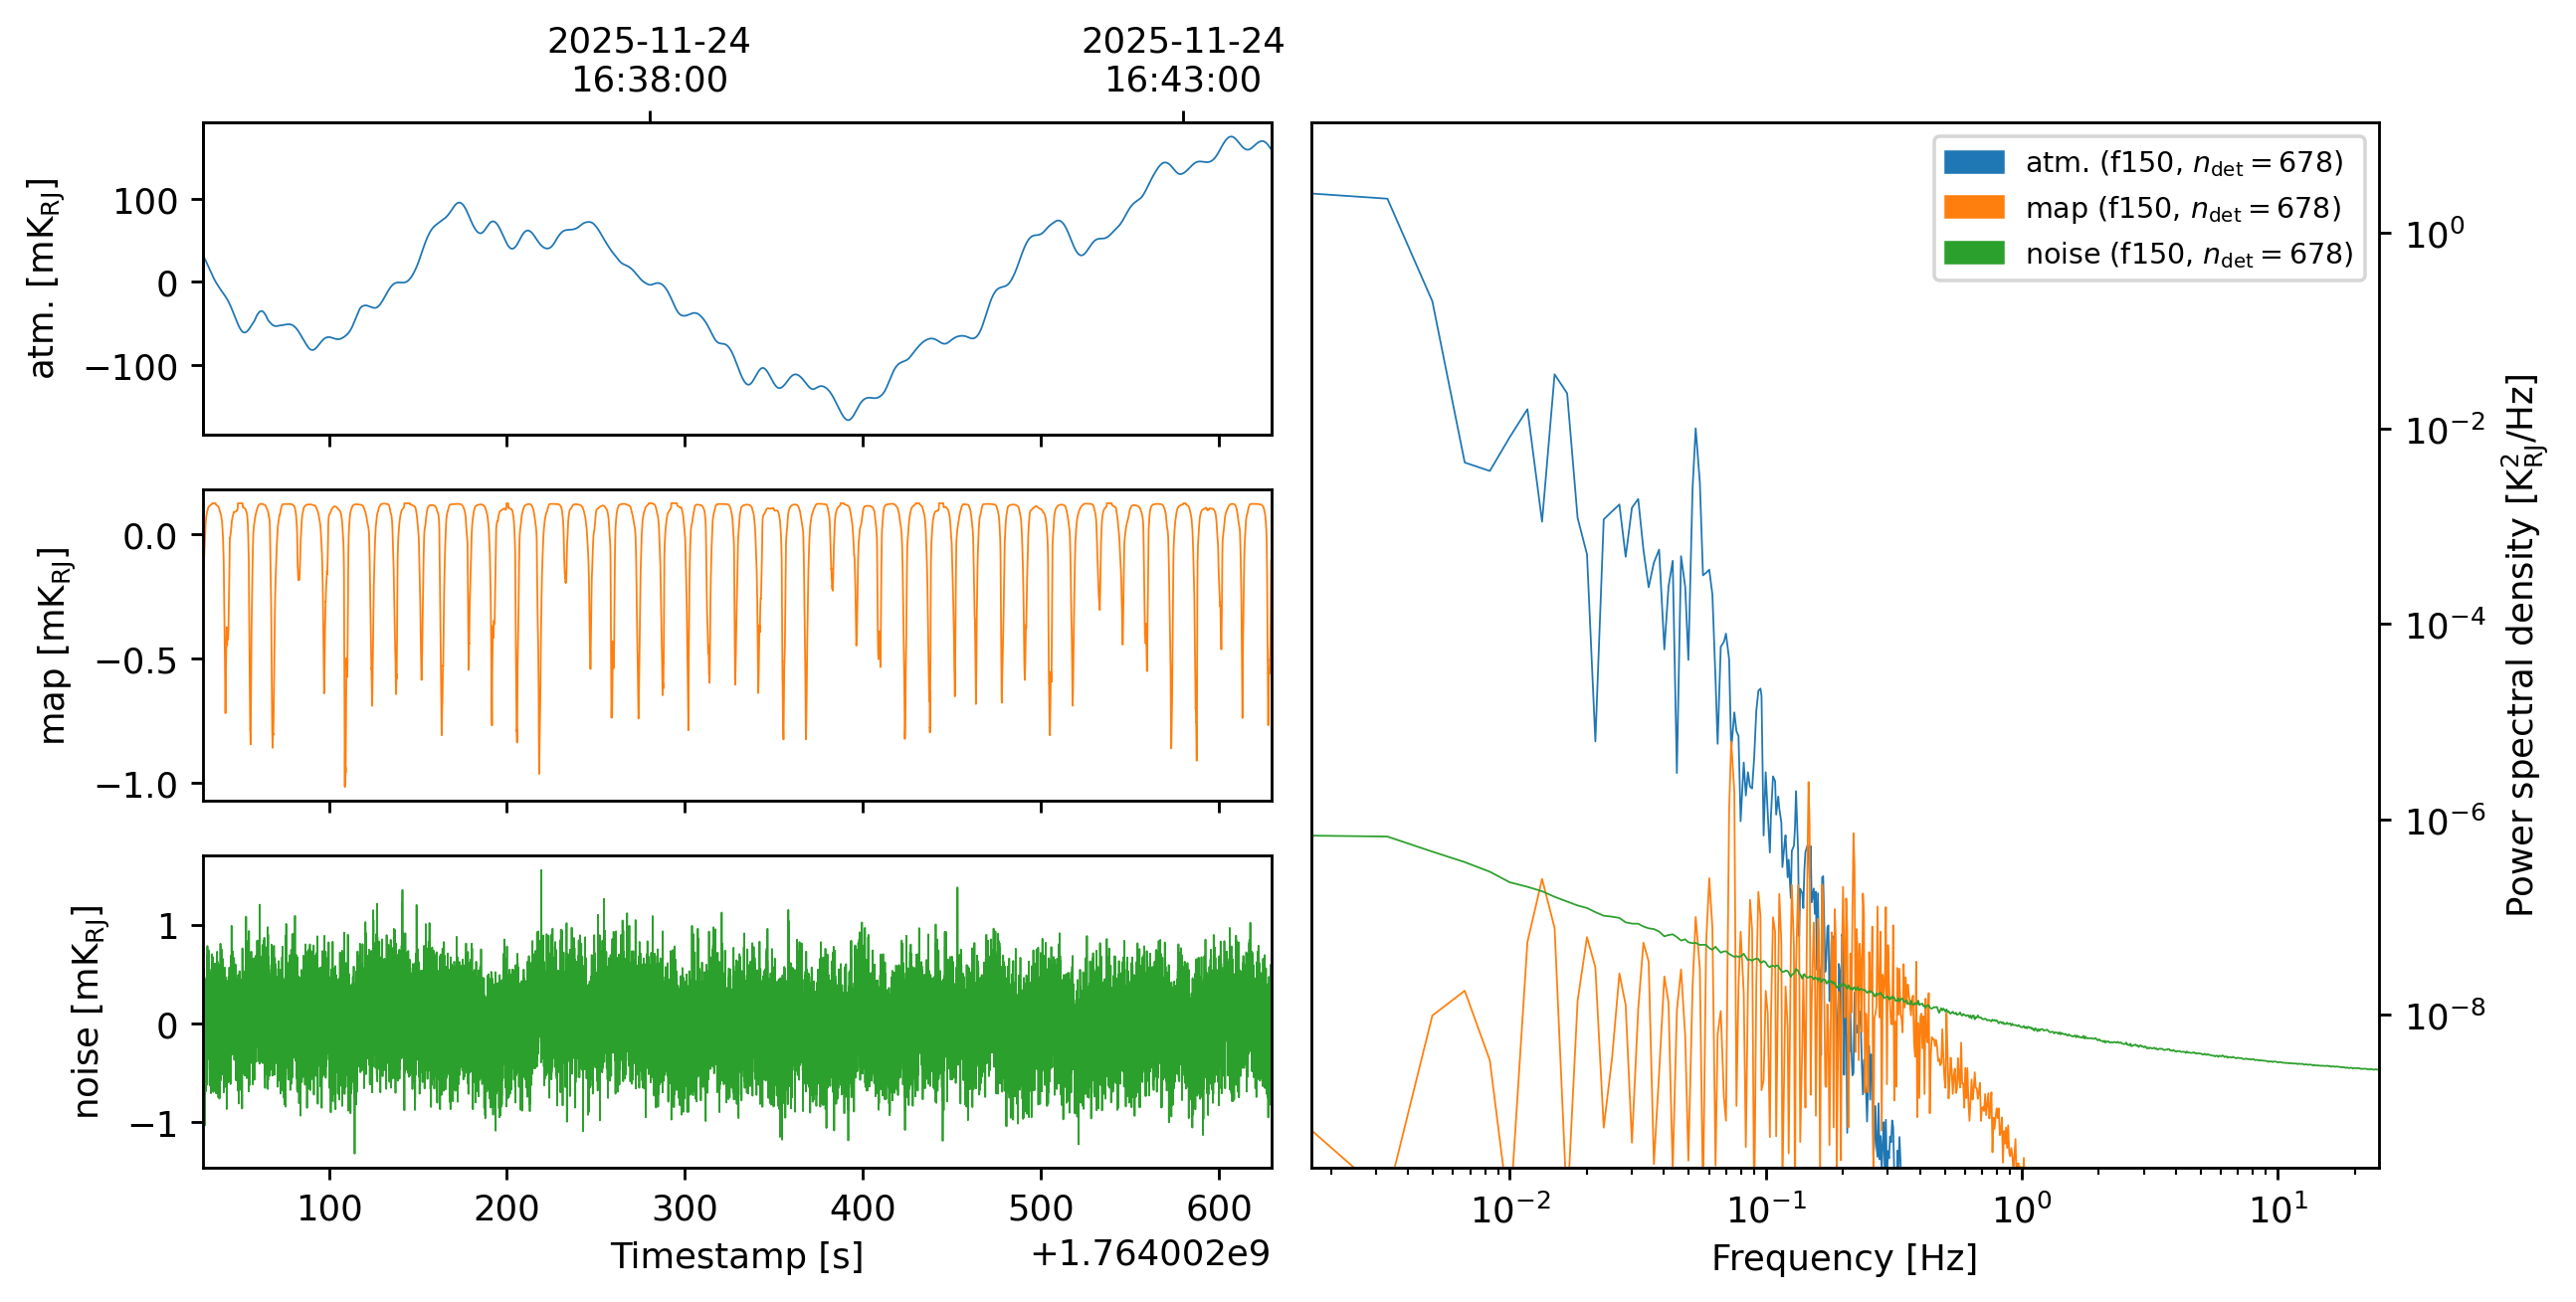

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(frame="ra/dec",
                                    width=0.8 * input_map.width.deg,
                                    height=0.8 * input_map.height.deg,
                                    tods=tods, 
                                    units="mK_RJ")


2025-11-23 19:56:58.294 INFO: Inferring center {'ra': '17ʰ19ᵐ59.39ˢ', 'dec': '-9°59’55.42”'} for mapper.


2025-11-23 19:56:58.308 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-23 19:56:58.310 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/2 [00:00<?, ?it/s]

Preprocessing TODs:  50%|████████        | 1/2 [00:01<00:01,  1.97s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:03<00:00,  2.00s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:03<00:00,  1.99s/it]

Mapping:   0%|          | 0/2 [00:00<?, ?it/s, tod=1/2]

Mapping:  50%|█████     | 1/2 [00:03<00:03,  3.99s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:08<00:00,  4.09s/it, tod=1/2]

Mapping: 100%|██████████| 2/2 [00:08<00:00,  4.07s/it, tod=1/2]

Computing noise model: 0it [00:00, ?it/s]

Computing noise model: 0it [00:00, ?it/s, tod=1/2]

Computing noise model: 1it [00:05,  5.60s/it, tod=1/2]

Computing noise model: 1it [00:05,  5.60s/it, tod=2/2]

Computing noise model: 2it [00:12,  6.14s/it, tod=2/2]

Computing noise model: 2it [00:12,  6.06s/it, tod=2/2]

The initial map is a "guess" constructing by heavily filtering the input TODs:

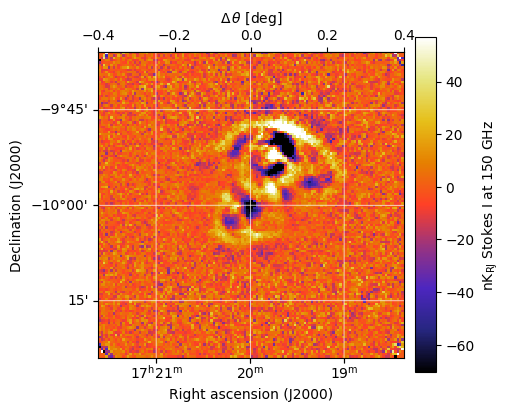

In [7]:
ml_mapper.map.plot()

To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e0)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:07<?, ?it/s, loss=4.902e+00]

epoch 1/4:   3%|▌               | 1/32 [00:07<03:38,  7.05s/it, loss=4.902e+00]

epoch 1/4:   3%|▌               | 1/32 [00:14<03:38,  7.05s/it, loss=4.890e+00]

epoch 1/4:   6%|█               | 2/32 [00:14<03:34,  7.15s/it, loss=4.890e+00]

epoch 1/4:   6%|█               | 2/32 [00:21<03:34,  7.15s/it, loss=4.854e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:21<03:30,  7.25s/it, loss=4.854e+00]

epoch 1/4:   9%|█▌              | 3/32 [00:28<03:30,  7.25s/it, loss=4.762e+00]

epoch 1/4:  12%|██              | 4/32 [00:28<03:23,  7.26s/it, loss=4.762e+00]

epoch 1/4:  12%|██              | 4/32 [00:36<03:23,  7.26s/it, loss=4.552e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:36<03:14,  7.22s/it, loss=4.552e+00]

epoch 1/4:  16%|██▌             | 5/32 [00:42<03:14,  7.22s/it, loss=4.166e+00]

epoch 1/4:  19%|███             | 6/32 [00:42<03:04,  7.11s/it, loss=4.166e+00]

epoch 1/4:  19%|███             | 6/32 [00:50<03:04,  7.11s/it, loss=3.928e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:50<02:58,  7.15s/it, loss=3.928e+00]

epoch 1/4:  22%|███▌            | 7/32 [00:57<02:58,  7.15s/it, loss=3.868e+00]

epoch 1/4:  25%|████            | 8/32 [00:57<02:52,  7.19s/it, loss=3.868e+00]

epoch 1/4:  25%|████            | 8/32 [01:04<02:52,  7.19s/it, loss=3.599e+00]

epoch 1/4:  28%|████▌           | 9/32 [01:04<02:43,  7.12s/it, loss=3.599e+00]

epoch 1/4:  28%|████▌           | 9/32 [01:11<02:43,  7.12s/it, loss=3.570e+00]

epoch 1/4:  31%|█████           | 10/32 [01:11<02:38,  7.19s/it, loss=3.570e+00]

epoch 1/4:  31%|█████           | 10/32 [01:18<02:38,  7.19s/it, loss=3.431e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:18<02:30,  7.17s/it, loss=3.431e+00]

epoch 1/4:  34%|█████▌          | 11/32 [01:26<02:30,  7.17s/it, loss=3.188e+00]

epoch 1/4:  38%|██████          | 12/32 [01:26<02:23,  7.17s/it, loss=3.188e+00]

epoch 1/4:  38%|██████          | 12/32 [01:33<02:23,  7.17s/it, loss=3.101e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:33<02:17,  7.23s/it, loss=3.101e+00]

epoch 1/4:  41%|██████▌         | 13/32 [01:40<02:17,  7.23s/it, loss=2.954e+00]

epoch 1/4:  44%|███████         | 14/32 [01:40<02:09,  7.17s/it, loss=2.954e+00]

epoch 1/4:  44%|███████         | 14/32 [01:47<02:09,  7.17s/it, loss=2.738e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:47<02:01,  7.13s/it, loss=2.738e+00]

epoch 1/4:  47%|███████▌        | 15/32 [01:54<02:01,  7.13s/it, loss=2.662e+00]

epoch 1/4:  50%|████████        | 16/32 [01:54<01:53,  7.12s/it, loss=2.662e+00]

epoch 1/4:  50%|████████        | 16/32 [02:01<01:53,  7.12s/it, loss=2.507e+00]

epoch 1/4:  53%|████████▌       | 17/32 [02:01<01:47,  7.17s/it, loss=2.507e+00]

epoch 1/4:  53%|████████▌       | 17/32 [02:08<01:47,  7.17s/it, loss=2.332e+00]

epoch 1/4:  56%|█████████       | 18/32 [02:08<01:39,  7.10s/it, loss=2.332e+00]

epoch 1/4:  56%|█████████       | 18/32 [02:15<01:39,  7.10s/it, loss=2.266e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [02:15<01:31,  7.05s/it, loss=2.266e+00]

epoch 1/4:  59%|█████████▌      | 19/32 [02:23<01:31,  7.05s/it, loss=2.056e+00]

epoch 1/4:  62%|██████████      | 20/32 [02:23<01:25,  7.14s/it, loss=2.056e+00]

epoch 1/4:  62%|██████████      | 20/32 [02:30<01:25,  7.14s/it, loss=1.969e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:30<01:18,  7.12s/it, loss=1.969e+00]

epoch 1/4:  66%|██████████▌     | 21/32 [02:37<01:18,  7.12s/it, loss=1.889e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:37<01:10,  7.10s/it, loss=1.889e+00]

epoch 1/4:  69%|███████████     | 22/32 [02:44<01:10,  7.10s/it, loss=1.788e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:44<01:03,  7.03s/it, loss=1.788e+00]

epoch 1/4:  72%|███████████▌    | 23/32 [02:51<01:03,  7.03s/it, loss=1.741e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:51<00:56,  7.10s/it, loss=1.741e+00]

epoch 1/4:  75%|████████████    | 24/32 [02:58<00:56,  7.10s/it, loss=1.616e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [02:58<00:49,  7.06s/it, loss=1.616e+00]

epoch 1/4:  78%|████████████▌   | 25/32 [03:05<00:49,  7.06s/it, loss=1.554e+00]

epoch 1/4:  81%|█████████████   | 26/32 [03:05<00:42,  7.11s/it, loss=1.554e+00]

epoch 1/4:  81%|█████████████   | 26/32 [03:12<00:42,  7.11s/it, loss=1.487e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [03:12<00:35,  7.12s/it, loss=1.487e+00]

epoch 1/4:  84%|█████████████▌  | 27/32 [03:19<00:35,  7.12s/it, loss=1.420e+00]

epoch 1/4:  88%|██████████████  | 28/32 [03:19<00:28,  7.16s/it, loss=1.420e+00]

epoch 1/4:  88%|██████████████  | 28/32 [03:26<00:28,  7.16s/it, loss=1.369e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [03:26<00:21,  7.10s/it, loss=1.369e+00]

epoch 1/4:  91%|██████████████▌ | 29/32 [03:34<00:21,  7.10s/it, loss=1.287e+00]

epoch 1/4:  94%|███████████████ | 30/32 [03:34<00:14,  7.14s/it, loss=1.287e+00]

epoch 1/4:  94%|███████████████ | 30/32 [03:41<00:14,  7.14s/it, loss=1.246e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [03:41<00:07,  7.08s/it, loss=1.246e+00]

epoch 1/4:  97%|███████████████▌| 31/32 [03:48<00:07,  7.08s/it, loss=1.192e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:48<00:00,  7.14s/it, loss=1.192e+00]

epoch 1/4: 100%|████████████████| 32/32 [03:48<00:00,  7.14s/it, loss=1.192e+00]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:07<?, ?it/s, loss=1.161e+00]

epoch 2/4:   3%|▌               | 1/32 [00:07<03:45,  7.27s/it, loss=1.161e+00]

epoch 2/4:   3%|▌               | 1/32 [00:14<03:45,  7.27s/it, loss=1.113e+00]

epoch 2/4:   6%|█               | 2/32 [00:14<03:32,  7.07s/it, loss=1.113e+00]

epoch 2/4:   6%|█               | 2/32 [00:21<03:32,  7.07s/it, loss=1.079e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:21<03:21,  6.96s/it, loss=1.079e+00]

epoch 2/4:   9%|█▌              | 3/32 [00:27<03:21,  6.96s/it, loss=1.048e+00]

epoch 2/4:  12%|██              | 4/32 [00:27<03:14,  6.93s/it, loss=1.048e+00]

epoch 2/4:  12%|██              | 4/32 [00:35<03:14,  6.93s/it, loss=1.019e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:35<03:09,  7.04s/it, loss=1.019e+00]

epoch 2/4:  16%|██▌             | 5/32 [00:42<03:09,  7.04s/it, loss=9.929e-01]

epoch 2/4:  19%|███             | 6/32 [00:42<03:05,  7.12s/it, loss=9.929e-01]

epoch 2/4:  19%|███             | 6/32 [00:49<03:05,  7.12s/it, loss=9.617e-01]

epoch 2/4:  22%|███▌            | 7/32 [00:49<03:00,  7.21s/it, loss=9.617e-01]

epoch 2/4:  22%|███▌            | 7/32 [00:57<03:00,  7.21s/it, loss=9.400e-01]

epoch 2/4:  25%|████            | 8/32 [00:57<02:53,  7.23s/it, loss=9.400e-01]

epoch 2/4:  25%|████            | 8/32 [01:04<02:53,  7.23s/it, loss=9.137e-01]

epoch 2/4:  28%|████▌           | 9/32 [01:04<02:45,  7.20s/it, loss=9.137e-01]

epoch 2/4:  28%|████▌           | 9/32 [01:11<02:45,  7.20s/it, loss=8.946e-01]

epoch 2/4:  31%|█████           | 10/32 [01:11<02:35,  7.07s/it, loss=8.946e-01]

epoch 2/4:  31%|█████           | 10/32 [01:17<02:35,  7.07s/it, loss=8.683e-01]

epoch 2/4:  34%|█████▌          | 11/32 [01:17<02:27,  7.01s/it, loss=8.683e-01]

epoch 2/4:  34%|█████▌          | 11/32 [01:24<02:27,  7.01s/it, loss=8.510e-01]

epoch 2/4:  38%|██████          | 12/32 [01:24<02:18,  6.92s/it, loss=8.510e-01]

epoch 2/4:  38%|██████          | 12/32 [01:31<02:18,  6.92s/it, loss=8.301e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:31<02:11,  6.91s/it, loss=8.301e-01]

epoch 2/4:  41%|██████▌         | 13/32 [01:38<02:11,  6.91s/it, loss=8.155e-01]

epoch 2/4:  44%|███████         | 14/32 [01:38<02:06,  7.02s/it, loss=8.155e-01]

epoch 2/4:  44%|███████         | 14/32 [01:45<02:06,  7.02s/it, loss=7.965e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:45<01:59,  7.05s/it, loss=7.965e-01]

epoch 2/4:  47%|███████▌        | 15/32 [01:52<01:59,  7.05s/it, loss=7.838e-01]

epoch 2/4:  50%|████████        | 16/32 [01:52<01:52,  7.01s/it, loss=7.838e-01]

epoch 2/4:  50%|████████        | 16/32 [02:00<01:52,  7.01s/it, loss=7.692e-01]

epoch 2/4:  53%|████████▌       | 17/32 [02:00<01:46,  7.11s/it, loss=7.692e-01]

epoch 2/4:  53%|████████▌       | 17/32 [02:07<01:46,  7.11s/it, loss=7.576e-01]

epoch 2/4:  56%|█████████       | 18/32 [02:07<01:39,  7.11s/it, loss=7.576e-01]

epoch 2/4:  56%|█████████       | 18/32 [02:14<01:39,  7.11s/it, loss=7.442e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [02:14<01:31,  7.06s/it, loss=7.442e-01]

epoch 2/4:  59%|█████████▌      | 19/32 [02:21<01:31,  7.06s/it, loss=7.328e-01]

epoch 2/4:  62%|██████████      | 20/32 [02:21<01:25,  7.12s/it, loss=7.328e-01]

epoch 2/4:  62%|██████████      | 20/32 [02:28<01:25,  7.12s/it, loss=7.218e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:28<01:18,  7.16s/it, loss=7.218e-01]

epoch 2/4:  66%|██████████▌     | 21/32 [02:35<01:18,  7.16s/it, loss=7.108e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:35<01:10,  7.05s/it, loss=7.108e-01]

epoch 2/4:  69%|███████████     | 22/32 [02:42<01:10,  7.05s/it, loss=7.016e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:42<01:03,  7.01s/it, loss=7.016e-01]

epoch 2/4:  72%|███████████▌    | 23/32 [02:49<01:03,  7.01s/it, loss=6.917e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:49<00:55,  6.92s/it, loss=6.917e-01]

epoch 2/4:  75%|████████████    | 24/32 [02:55<00:55,  6.92s/it, loss=6.841e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [02:55<00:48,  6.88s/it, loss=6.841e-01]

epoch 2/4:  78%|████████████▌   | 25/32 [03:03<00:48,  6.88s/it, loss=6.747e-01]

epoch 2/4:  81%|█████████████   | 26/32 [03:03<00:41,  6.99s/it, loss=6.747e-01]

epoch 2/4:  81%|█████████████   | 26/32 [03:10<00:41,  6.99s/it, loss=6.680e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [03:10<00:35,  7.06s/it, loss=6.680e-01]

epoch 2/4:  84%|█████████████▌  | 27/32 [03:17<00:35,  7.06s/it, loss=6.600e-01]

epoch 2/4:  88%|██████████████  | 28/32 [03:17<00:28,  7.08s/it, loss=6.600e-01]

epoch 2/4:  88%|██████████████  | 28/32 [03:24<00:28,  7.08s/it, loss=6.537e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [03:24<00:21,  7.07s/it, loss=6.537e-01]

epoch 2/4:  91%|██████████████▌ | 29/32 [03:31<00:21,  7.07s/it, loss=6.470e-01]

epoch 2/4:  94%|███████████████ | 30/32 [03:31<00:14,  7.03s/it, loss=6.470e-01]

epoch 2/4:  94%|███████████████ | 30/32 [03:38<00:14,  7.03s/it, loss=6.408e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [03:38<00:06,  6.98s/it, loss=6.408e-01]

epoch 2/4:  97%|███████████████▌| 31/32 [03:45<00:06,  6.98s/it, loss=6.355e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:45<00:00,  6.97s/it, loss=6.355e-01]

epoch 2/4: 100%|████████████████| 32/32 [03:45<00:00,  7.04s/it, loss=6.355e-01]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:06<?, ?it/s, loss=6.296e-01]

epoch 3/4:   3%|▌               | 1/32 [00:06<03:33,  6.88s/it, loss=6.296e-01]

epoch 3/4:   3%|▌               | 1/32 [00:13<03:33,  6.88s/it, loss=6.250e-01]

epoch 3/4:   6%|█               | 2/32 [00:13<03:28,  6.96s/it, loss=6.250e-01]

epoch 3/4:   6%|█               | 2/32 [00:20<03:28,  6.96s/it, loss=6.200e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:20<03:22,  6.98s/it, loss=6.200e-01]

epoch 3/4:   9%|█▌              | 3/32 [00:27<03:22,  6.98s/it, loss=6.158e-01]

epoch 3/4:  12%|██              | 4/32 [00:27<03:15,  6.97s/it, loss=6.158e-01]

epoch 3/4:  12%|██              | 4/32 [00:34<03:15,  6.97s/it, loss=6.118e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:34<03:07,  6.93s/it, loss=6.118e-01]

epoch 3/4:  16%|██▌             | 5/32 [00:41<03:07,  6.93s/it, loss=6.078e-01]

epoch 3/4:  19%|███             | 6/32 [00:41<02:59,  6.91s/it, loss=6.078e-01]

epoch 3/4:  19%|███             | 6/32 [00:48<02:59,  6.91s/it, loss=6.046e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:48<02:54,  6.96s/it, loss=6.046e-01]

epoch 3/4:  22%|███▌            | 7/32 [00:55<02:54,  6.96s/it, loss=6.010e-01]

epoch 3/4:  25%|████            | 8/32 [00:55<02:48,  7.00s/it, loss=6.010e-01]

epoch 3/4:  25%|████            | 8/32 [01:02<02:48,  7.00s/it, loss=5.980e-01]

epoch 3/4:  28%|████▌           | 9/32 [01:02<02:41,  7.01s/it, loss=5.980e-01]

epoch 3/4:  28%|████▌           | 9/32 [01:09<02:41,  7.01s/it, loss=5.952e-01]

epoch 3/4:  31%|█████           | 10/32 [01:09<02:35,  7.06s/it, loss=5.952e-01]

epoch 3/4:  31%|█████           | 10/32 [01:17<02:35,  7.06s/it, loss=5.921e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:17<02:28,  7.06s/it, loss=5.921e-01]

epoch 3/4:  34%|█████▌          | 11/32 [01:24<02:28,  7.06s/it, loss=5.896e-01]

epoch 3/4:  38%|██████          | 12/32 [01:24<02:21,  7.06s/it, loss=5.896e-01]

epoch 3/4:  38%|██████          | 12/32 [01:31<02:21,  7.06s/it, loss=5.869e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:31<02:13,  7.05s/it, loss=5.869e-01]

epoch 3/4:  41%|██████▌         | 13/32 [01:37<02:13,  7.05s/it, loss=5.844e-01]

epoch 3/4:  44%|███████         | 14/32 [01:37<02:05,  6.99s/it, loss=5.844e-01]

epoch 3/4:  44%|███████         | 14/32 [01:44<02:05,  6.99s/it, loss=5.821e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:44<01:56,  6.86s/it, loss=5.821e-01]

epoch 3/4:  47%|███████▌        | 15/32 [01:51<01:56,  6.86s/it, loss=5.796e-01]

epoch 3/4:  50%|████████        | 16/32 [01:51<01:50,  6.93s/it, loss=5.796e-01]

epoch 3/4:  50%|████████        | 16/32 [01:58<01:50,  6.93s/it, loss=5.774e-01]

epoch 3/4:  53%|████████▌       | 17/32 [01:58<01:44,  7.00s/it, loss=5.774e-01]

epoch 3/4:  53%|████████▌       | 17/32 [02:05<01:44,  7.00s/it, loss=5.752e-01]

epoch 3/4:  56%|█████████       | 18/32 [02:05<01:37,  7.00s/it, loss=5.752e-01]

epoch 3/4:  56%|█████████       | 18/32 [02:12<01:37,  7.00s/it, loss=5.730e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [02:12<01:30,  6.93s/it, loss=5.730e-01]

epoch 3/4:  59%|█████████▌      | 19/32 [02:19<01:30,  6.93s/it, loss=5.710e-01]

epoch 3/4:  62%|██████████      | 20/32 [02:19<01:23,  6.96s/it, loss=5.710e-01]

epoch 3/4:  62%|██████████      | 20/32 [02:26<01:23,  6.96s/it, loss=5.690e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:26<01:16,  6.97s/it, loss=5.690e-01]

epoch 3/4:  66%|██████████▌     | 21/32 [02:33<01:16,  6.97s/it, loss=5.670e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:33<01:09,  6.92s/it, loss=5.670e-01]

epoch 3/4:  69%|███████████     | 22/32 [02:40<01:09,  6.92s/it, loss=5.652e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:40<01:02,  6.92s/it, loss=5.652e-01]

epoch 3/4:  72%|███████████▌    | 23/32 [02:47<01:02,  6.92s/it, loss=5.634e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:47<00:55,  6.98s/it, loss=5.634e-01]

epoch 3/4:  75%|████████████    | 24/32 [02:54<00:55,  6.98s/it, loss=5.616e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [02:54<00:48,  6.98s/it, loss=5.616e-01]

epoch 3/4:  78%|████████████▌   | 25/32 [03:01<00:48,  6.98s/it, loss=5.599e-01]

epoch 3/4:  81%|█████████████   | 26/32 [03:01<00:41,  6.91s/it, loss=5.599e-01]

epoch 3/4:  81%|█████████████   | 26/32 [03:08<00:41,  6.91s/it, loss=5.582e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [03:08<00:34,  6.91s/it, loss=5.582e-01]

epoch 3/4:  84%|█████████████▌  | 27/32 [03:15<00:34,  6.91s/it, loss=5.565e-01]

epoch 3/4:  88%|██████████████  | 28/32 [03:15<00:27,  6.97s/it, loss=5.565e-01]

epoch 3/4:  88%|██████████████  | 28/32 [03:22<00:27,  6.97s/it, loss=5.550e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [03:22<00:20,  6.99s/it, loss=5.550e-01]

epoch 3/4:  91%|██████████████▌ | 29/32 [03:29<00:20,  6.99s/it, loss=5.534e-01]

epoch 3/4:  94%|███████████████ | 30/32 [03:29<00:13,  6.99s/it, loss=5.534e-01]

epoch 3/4:  94%|███████████████ | 30/32 [03:36<00:13,  6.99s/it, loss=5.519e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [03:36<00:06,  6.98s/it, loss=5.519e-01]

epoch 3/4:  97%|███████████████▌| 31/32 [03:43<00:06,  6.98s/it, loss=5.505e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:43<00:00,  6.97s/it, loss=5.505e-01]

epoch 3/4: 100%|████████████████| 32/32 [03:43<00:00,  6.97s/it, loss=5.505e-01]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:07<?, ?it/s, loss=5.491e-01]

epoch 4/4:   3%|▌               | 1/32 [00:07<03:38,  7.04s/it, loss=5.491e-01]

epoch 4/4:   3%|▌               | 1/32 [00:13<03:38,  7.04s/it, loss=5.477e-01]

epoch 4/4:   6%|█               | 2/32 [00:13<03:28,  6.94s/it, loss=5.477e-01]

epoch 4/4:   6%|█               | 2/32 [00:20<03:28,  6.94s/it, loss=5.464e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:20<03:17,  6.81s/it, loss=5.464e-01]

epoch 4/4:   9%|█▌              | 3/32 [00:27<03:17,  6.81s/it, loss=5.451e-01]

epoch 4/4:  12%|██              | 4/32 [00:27<03:14,  6.93s/it, loss=5.451e-01]

epoch 4/4:  12%|██              | 4/32 [00:34<03:14,  6.93s/it, loss=5.439e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:34<03:06,  6.91s/it, loss=5.439e-01]

epoch 4/4:  16%|██▌             | 5/32 [00:41<03:06,  6.91s/it, loss=5.426e-01]

epoch 4/4:  19%|███             | 6/32 [00:41<02:58,  6.88s/it, loss=5.426e-01]

epoch 4/4:  19%|███             | 6/32 [00:47<02:58,  6.88s/it, loss=5.415e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:47<02:49,  6.77s/it, loss=5.415e-01]

epoch 4/4:  22%|███▌            | 7/32 [00:54<02:49,  6.77s/it, loss=5.403e-01]

epoch 4/4:  25%|████            | 8/32 [00:54<02:41,  6.74s/it, loss=5.403e-01]

epoch 4/4:  25%|████            | 8/32 [01:01<02:41,  6.74s/it, loss=5.392e-01]

epoch 4/4:  28%|████▌           | 9/32 [01:01<02:36,  6.78s/it, loss=5.392e-01]

epoch 4/4:  28%|████▌           | 9/32 [01:08<02:36,  6.78s/it, loss=5.381e-01]

epoch 4/4:  31%|█████           | 10/32 [01:08<02:30,  6.85s/it, loss=5.381e-01]

epoch 4/4:  31%|█████           | 10/32 [01:14<02:30,  6.85s/it, loss=5.371e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:14<02:20,  6.70s/it, loss=5.371e-01]

epoch 4/4:  34%|█████▌          | 11/32 [01:21<02:20,  6.70s/it, loss=5.361e-01]

epoch 4/4:  38%|██████          | 12/32 [01:21<02:15,  6.78s/it, loss=5.361e-01]

epoch 4/4:  38%|██████          | 12/32 [01:28<02:15,  6.78s/it, loss=5.351e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:28<02:09,  6.83s/it, loss=5.351e-01]

epoch 4/4:  41%|██████▌         | 13/32 [01:35<02:09,  6.83s/it, loss=5.341e-01]

epoch 4/4:  44%|███████         | 14/32 [01:35<02:04,  6.91s/it, loss=5.341e-01]

epoch 4/4:  44%|███████         | 14/32 [01:42<02:04,  6.91s/it, loss=5.332e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:42<01:57,  6.89s/it, loss=5.332e-01]

epoch 4/4:  47%|███████▌        | 15/32 [01:49<01:57,  6.89s/it, loss=5.323e-01]

epoch 4/4:  50%|████████        | 16/32 [01:49<01:48,  6.77s/it, loss=5.323e-01]

epoch 4/4:  50%|████████        | 16/32 [01:56<01:48,  6.77s/it, loss=5.315e-01]

epoch 4/4:  53%|████████▌       | 17/32 [01:56<01:41,  6.80s/it, loss=5.315e-01]

epoch 4/4:  53%|████████▌       | 17/32 [02:02<01:41,  6.80s/it, loss=5.306e-01]

epoch 4/4:  56%|█████████       | 18/32 [02:02<01:34,  6.78s/it, loss=5.306e-01]

epoch 4/4:  56%|█████████       | 18/32 [02:09<01:34,  6.78s/it, loss=5.298e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [02:09<01:29,  6.90s/it, loss=5.298e-01]

epoch 4/4:  59%|█████████▌      | 19/32 [02:17<01:29,  6.90s/it, loss=5.290e-01]

epoch 4/4:  62%|██████████      | 20/32 [02:17<01:24,  7.02s/it, loss=5.290e-01]

epoch 4/4:  62%|██████████      | 20/32 [02:24<01:24,  7.02s/it, loss=5.283e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:24<01:17,  7.01s/it, loss=5.283e-01]

epoch 4/4:  66%|██████████▌     | 21/32 [02:31<01:17,  7.01s/it, loss=5.275e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:31<01:10,  7.05s/it, loss=5.275e-01]

epoch 4/4:  69%|███████████     | 22/32 [02:38<01:10,  7.05s/it, loss=5.268e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:38<01:03,  7.04s/it, loss=5.268e-01]

epoch 4/4:  72%|███████████▌    | 23/32 [02:45<01:03,  7.04s/it, loss=5.261e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:45<00:56,  7.06s/it, loss=5.261e-01]

epoch 4/4:  75%|████████████    | 24/32 [02:52<00:56,  7.06s/it, loss=5.254e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:52<00:49,  7.07s/it, loss=5.254e-01]

epoch 4/4:  78%|████████████▌   | 25/32 [02:59<00:49,  7.07s/it, loss=5.247e-01]

epoch 4/4:  81%|█████████████   | 26/32 [02:59<00:42,  7.05s/it, loss=5.247e-01]

epoch 4/4:  81%|█████████████   | 26/32 [03:06<00:42,  7.05s/it, loss=5.241e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [03:06<00:34,  6.95s/it, loss=5.241e-01]

epoch 4/4:  84%|█████████████▌  | 27/32 [03:12<00:34,  6.95s/it, loss=5.235e-01]

epoch 4/4:  88%|██████████████  | 28/32 [03:12<00:27,  6.86s/it, loss=5.235e-01]

epoch 4/4:  88%|██████████████  | 28/32 [03:19<00:27,  6.86s/it, loss=5.229e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [03:19<00:20,  6.90s/it, loss=5.229e-01]

epoch 4/4:  91%|██████████████▌ | 29/32 [03:27<00:20,  6.90s/it, loss=5.223e-01]

epoch 4/4:  94%|███████████████ | 30/32 [03:27<00:14,  7.01s/it, loss=5.223e-01]

epoch 4/4:  94%|███████████████ | 30/32 [03:34<00:14,  7.01s/it, loss=5.217e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [03:34<00:06,  7.00s/it, loss=5.217e-01]

epoch 4/4:  97%|███████████████▌| 31/32 [03:41<00:06,  7.00s/it, loss=5.211e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:41<00:00,  7.05s/it, loss=5.211e-01]

epoch 4/4: 100%|████████████████| 32/32 [03:41<00:00,  6.92s/it, loss=5.211e-01]

In [9]:
ml_mapper.map_units

'K_RJ'

In [10]:
ml_mapper.tod_units

'mK_RJ'

which gives us an improved map

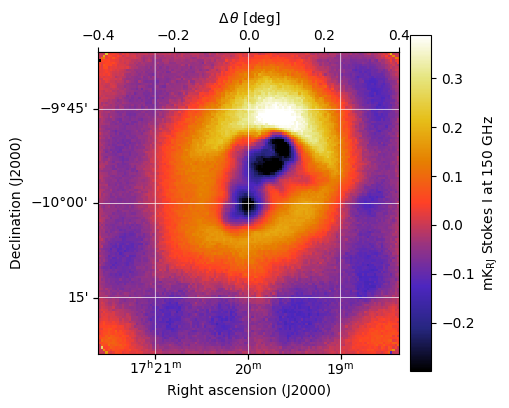

In [11]:
ml_mapper.map.plot()

that will improve more as it continues to fit.